# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
sns.set_palette('colorblind')
from calendar import day_name

In [2]:
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [75]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head(5)

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known
5,Accident,accident_severity,1,Fatal,NaN
6,Accident,accident_severity,2,Serious,NaN
7,Accident,accident_severity,3,Slight,NaN
8,Accident,number_of_vehicles,NaN,NaN,NaN
9,Accident,number_of_casualties,NaN,NaN,NaN


## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## GENERAL OVERVIEW OF THE DATA

### Accidents dataset
- It has 14 missing values in longitude and latitude
- Converted data column to datetime

In [76]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [77]:
accidents['road_surface_conditions']

0        9
1        1
2        2
3        1
4        1
        ..
91194    1
91195    1
91196    1
91197    1
91198    1
Name: road_surface_conditions, Length: 91199, dtype: int64

In [78]:
# Converted `date` column to datetime object
accidents['date'] = pd.to_datetime(accidents['date'], format='%d/%m/%Y')

## EXPLORATORY DATA ANALYSIS

In [79]:
# Descriptive statistics
accidents['number_of_casualties'].describe()

count    91199.000000
mean         1.267382
std          0.681473
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         41.000000
Name: number_of_casualties, dtype: float64

In [80]:
# Further exploration
# DAY OF WEEK WITH MOST MAJOR INCIDENTS
# GET THE NAME OF DAY
accidents['weekday_name'] = accidents['day_of_week'].apply(lambda day_int: day_name[day_int-1])

In [81]:
# GET HOUR OF INCIDENTS
accidents['hour_of_day'] = accidents['time'].str.split(':', expand=True)[0]
accidents['hour_of_day'] = accidents['hour_of_day'].astype(int)

In [82]:
# Create a Mask for Major incidents
mask = accidents['number_of_casualties'] >= 3

# Create a new dataframe ---> major_indic
major_indc = accidents[mask]

major_indc # 4800 major incidents

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,weekday_name,hour_of_day
11,2020010228024,2020,10228024,-0.058620,51.660013,2,3,4,2020-01-01,4,...,0,5,4,1,2,0,0,1,Thursday,3
136,2020010228521,2020,10228521,-0.086520,51.616219,3,1,4,2020-01-03,6,...,0,9,4,1,1,0,0,1,Saturday,22
173,2020010228625,2020,10228625,-0.190729,51.459756,3,3,3,2020-01-05,1,...,0,0,1,1,1,0,0,1,Monday,11
187,2020010228670,2020,10228670,0.185884,51.478366,3,2,3,2020-01-05,1,...,0,0,1,1,1,0,0,1,Monday,14
212,2020010228789,2020,10228789,-0.251891,51.553577,2,2,4,2020-01-06,2,...,0,0,4,1,1,6,0,1,Tuesday,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91141,2020991011301,2020,991011301,-3.912823,55.793998,2,1,3,2020-12-26,7,...,0,0,4,2,2,0,0,1,Sunday,21
91153,2020991012275,2020,991012275,-3.725555,56.390843,3,1,3,2020-08-08,7,...,0,0,1,1,1,0,0,2,Sunday,19
91167,2020991012929,2020,991012929,-2.548388,56.631179,2,2,5,2020-12-28,2,...,0,0,6,1,4,0,0,2,Tuesday,16
91173,2020991014080,2020,991014080,-2.411295,56.871085,2,2,3,2020-08-02,1,...,0,0,1,1,1,0,0,2,Monday,15


In [83]:
# Groupbs by weekday_name and sums the no of casualities
wk_day = major_indc.groupby('weekday_name')['number_of_casualties'].sum().sort_values(ascending=False).reset_index() # SUNDAY
wk_day

,weekday_name,number_of_casualties
0,Sunday,2897
1,Saturday,2772
2,Monday,2474
3,Friday,2275
4,Thursday,2231
5,Wednesday,2187
6,Tuesday,2145


In [84]:
# Time of Day --> specific time with major incidents
tim_of_day = major_indc.groupby('time')['number_of_casualties'].sum().sort_values(ascending=False).reset_index() # 4:30 PM
tim_of_day.head()

,time,number_of_casualties
0,16:30,129
1,15:30,128
2,16:00,119
3,14:00,110
4,16:40,107


In [85]:
# Generalized time of major incidents ----> Hourly 24hrs/Day
hour_of_day = major_indc.groupby('hour_of_day')['number_of_casualties'].sum().sort_values(ascending=False).reset_index()
hour_of_day.head()

,hour_of_day,number_of_casualties
0,16,1575
1,15,1418
2,17,1306
3,14,1291
4,18,1178


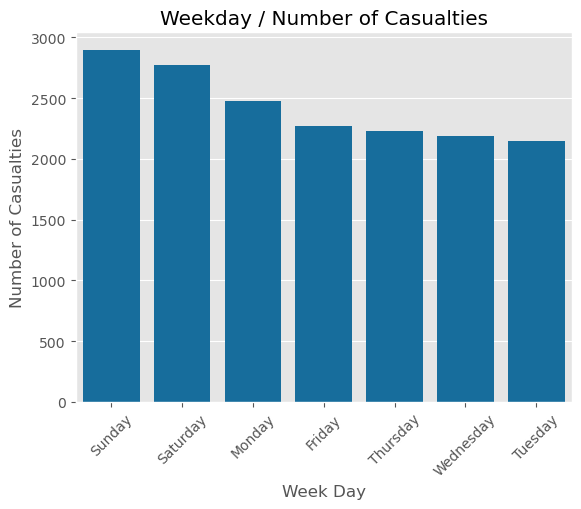

In [86]:
sns.barplot(data=wk_day, x='weekday_name', y='number_of_casualties').set(xlabel='Week Day', 
                                                                         ylabel='Number of Casualties', 
                                                                         title='Weekday / Number of Casualties')
plt.xticks(rotation=45);

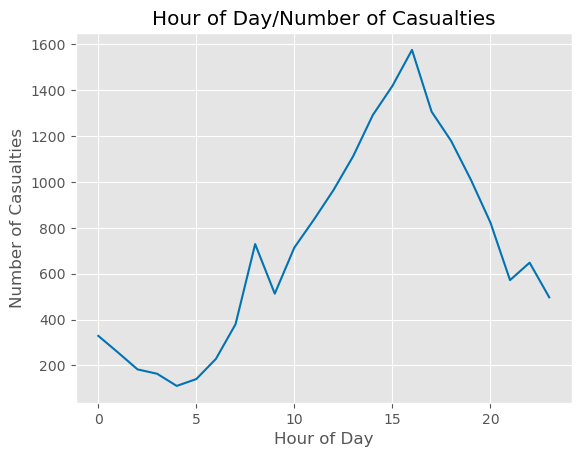

In [87]:
sns.lineplot(data=hour_of_day, x='hour_of_day', y='number_of_casualties').set(title='Hour of Day/Number of Casualties',
                                                                             xlabel='Hour of Day',
                                                                             ylabel='Number of Casualties');

# PLOTTING VARIATION WITH DIFFERENT CONDITIONS

In [88]:
def get_code_labels_dict(condition: str) -> {}:
    mask = lookup['field name'] == condition
    cond = lookup[mask]
    cond = cond[['code/format', 'label']]
    cond['code/format'] = cond['code/format'].astype(int)
    cond.index = cond['code/format']
    cond.drop(columns='code/format', inplace=True)
    cond_dict = cond.to_dict()
    return cond_dict['label']

In [89]:
def plot_condition_graph(col: str, leg_title: str, cond_dict: {}):

    plt.figure(figsize=(10, 6))
    
    for val in cond_dict.values():
        mask = major_indc[col] == val
        df = major_indc[mask]
        # fig, ax = plt.subplots(figsize=(12, 6))
        new_df = df.groupby('hour_of_day')['number_of_casualties'].sum().reset_index()
        sns.lineplot(data=new_df, x='hour_of_day', y='number_of_casualties', label=val).set(title='Hour of Day/Number of Casualties',
                                                                                 xlabel=f'Hour of Day',
                                                                                 ylabel='Number of Casualties')
        plt.legend(title=leg_title);

In [90]:
DD = ['accident_year', 'accident_reference',
       'longitude', 'Latitude', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'first_road_class', 'first_road_number', 'road_type',
       'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities',
       'special_conditions_at_site', 'carriageway_hazard']

In [101]:
lookup[lookup['field name'] == 'special_conditions_at_site']

,table,field name,code/format,label,note
105,Accident,special_conditions_at_site,0,NaN,NaN
106,Accident,special_conditions_at_site,1,Auto traffic signal - out,NaN
107,Accident,special_conditions_at_site,2,Auto signal part defective,NaN
108,Accident,special_conditions_at_site,3,Road sign or marking defective or obscured,NaN
109,Accident,special_conditions_at_site,4,Roadworks,NaN
110,Accident,special_conditions_at_site,5,Road surface defective,NaN
111,Accident,special_conditions_at_site,6,Oil or diesel,NaN
112,Accident,special_conditions_at_site,7,Mud,NaN
113,Accident,special_conditions_at_site,-1,Data missing or out of range,NaN
114,Accident,special_conditions_at_site,9,unknown (self reported),NaN


## Variation with weather_conditions

In [91]:
weather_cond = get_code_labels_dict('weather_conditions')
weather_cond

{1: 'Fine no high winds',
 2: 'Raining no high winds',
 3: 'Snowing no high winds',
 4: 'Fine + high winds',
 5: 'Raining + high winds',
 6: 'Snowing + high winds',
 7: 'Fog or mist',
 8: 'Other',
 9: 'Unknown',
 -1: 'Data missing or out of range'}

In [92]:
major_indc = major_indc.copy()
major_indc['weather_condition_labels'] = major_indc['weather_conditions'].apply(lambda x: weather_cond[x])

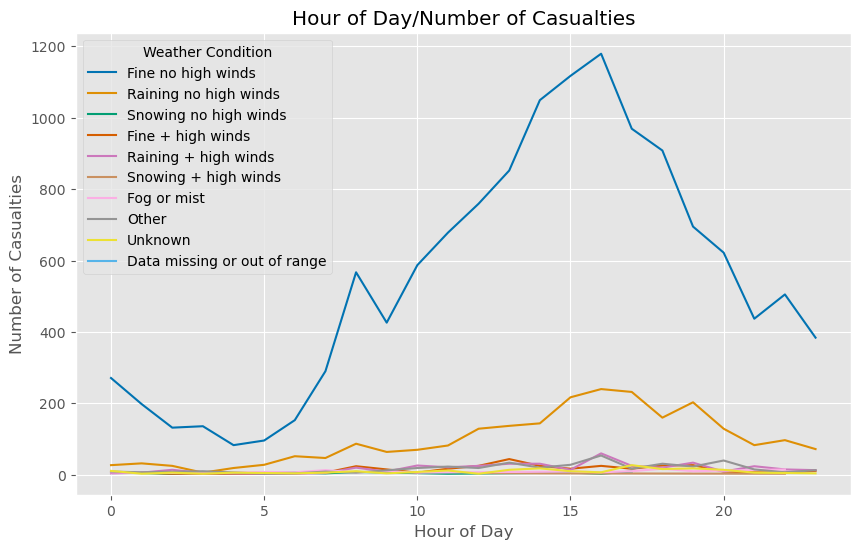

In [93]:
plot_condition_graph(col='weather_condition_labels', leg_title='Weather Condition', cond_dict=weather_cond)

In [94]:
plot_condition_graph?

Signature: plot_condition_graph(col: str, leg_title: str, cond_dict: {})
Docstring: <no docstring>
File:      /tmp/ipykernel_62041/3576919951.py
Type:      function

## Variation with light conditions

In [95]:
light_cond = get_code_labels_dict('light_conditions')
light_cond

{1: 'Daylight',
 4: 'Darkness - lights lit',
 5: 'Darkness - lights unlit',
 6: 'Darkness - no lighting',
 7: 'Darkness - lighting unknown',
 -1: 'Data missing or out of range'}

In [96]:
major_indc = major_indc.copy()
major_indc['light_condition_labels'] = major_indc['light_conditions'].apply(lambda x: light_cond[x])

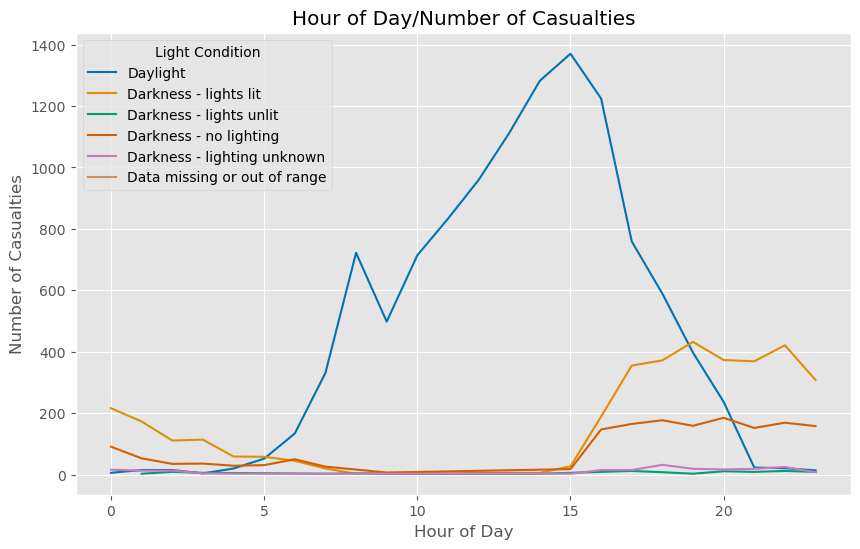

In [97]:
plot_condition_graph(col='light_condition_labels', leg_title='Light Condition', cond_dict=light_cond)

## Variation with Road surface condition

In [98]:
road_sur_cond = get_code_labels_dict('road_surface_conditions')
road_sur_cond

{1: 'Dry',
 2: 'Wet or damp',
 3: 'Snow',
 4: 'Frost or ice',
 5: 'Flood over 3cm. deep',
 6: 'Oil or diesel',
 7: 'Mud',
 -1: 'Data missing or out of range',
 9: 'unknown (self reported)'}

In [99]:
major_indc = major_indc.copy()
major_indc['road_surf_condition_labels'] = major_indc['road_surface_conditions'].apply(lambda x: road_sur_cond[x])

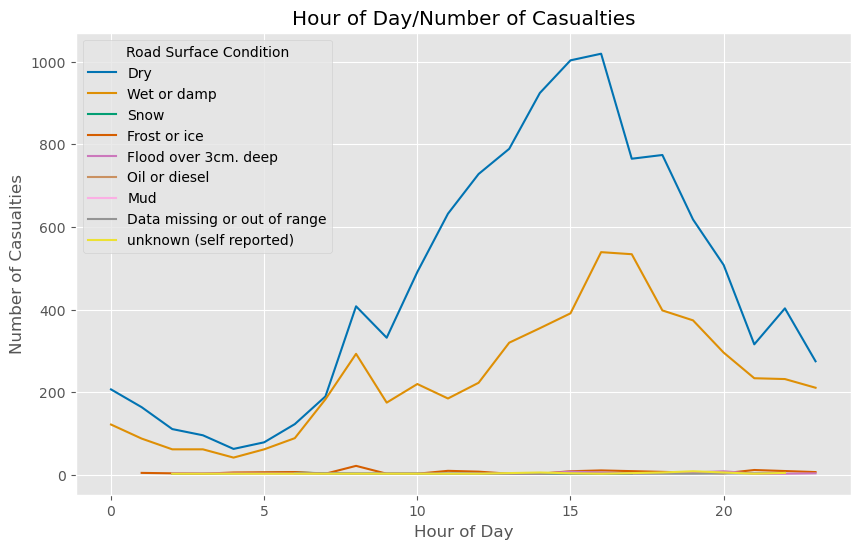

In [100]:
plot_condition_graph(col='road_surf_condition_labels', leg_title='Road Surface Condition', cond_dict=road_sur_cond)

## Variation with Special Conditions at Site

In [102]:
spec_cond = get_code_labels_dict('special_conditions_at_site')
spec_cond

{0: nan,
 1: 'Auto traffic signal - out',
 2: 'Auto signal part defective',
 3: 'Road sign or marking defective or obscured',
 4: 'Roadworks',
 5: 'Road surface defective',
 6: 'Oil or diesel',
 7: 'Mud',
 -1: 'Data missing or out of range',
 9: 'unknown (self reported)'}

In [103]:
major_indc = major_indc.copy()
major_indc['special_conditions_at_site_labels'] = major_indc['special_conditions_at_site'].apply(lambda x: spec_cond[x])

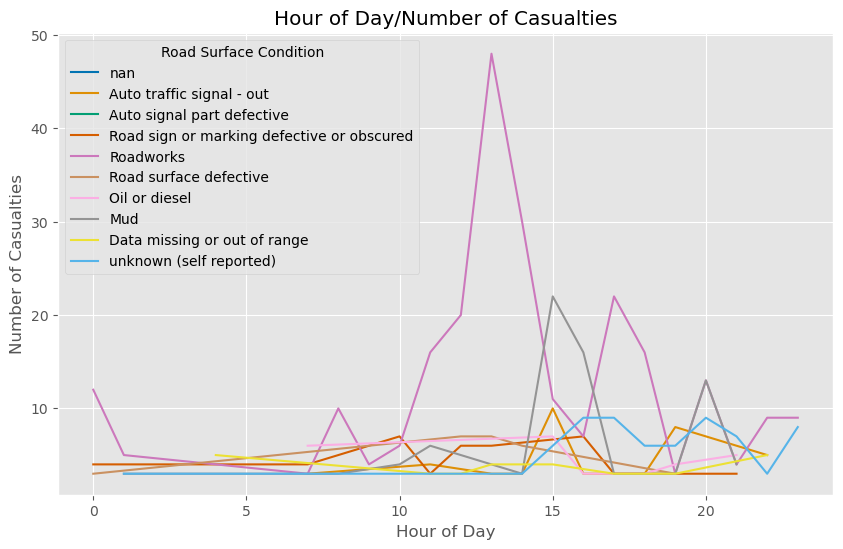

In [104]:
plot_condition_graph(col='special_conditions_at_site_labels', leg_title='Road Surface Condition', cond_dict=spec_cond)